## Exploratory Data Analytics: bank_churn.csv

In [1]:
import numpy as np 
import pandas as pd 
pd.plotting.register_matplotlib_converters()

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid")

In [2]:
data = pd.read_csv('bank_churn.csv')
data.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

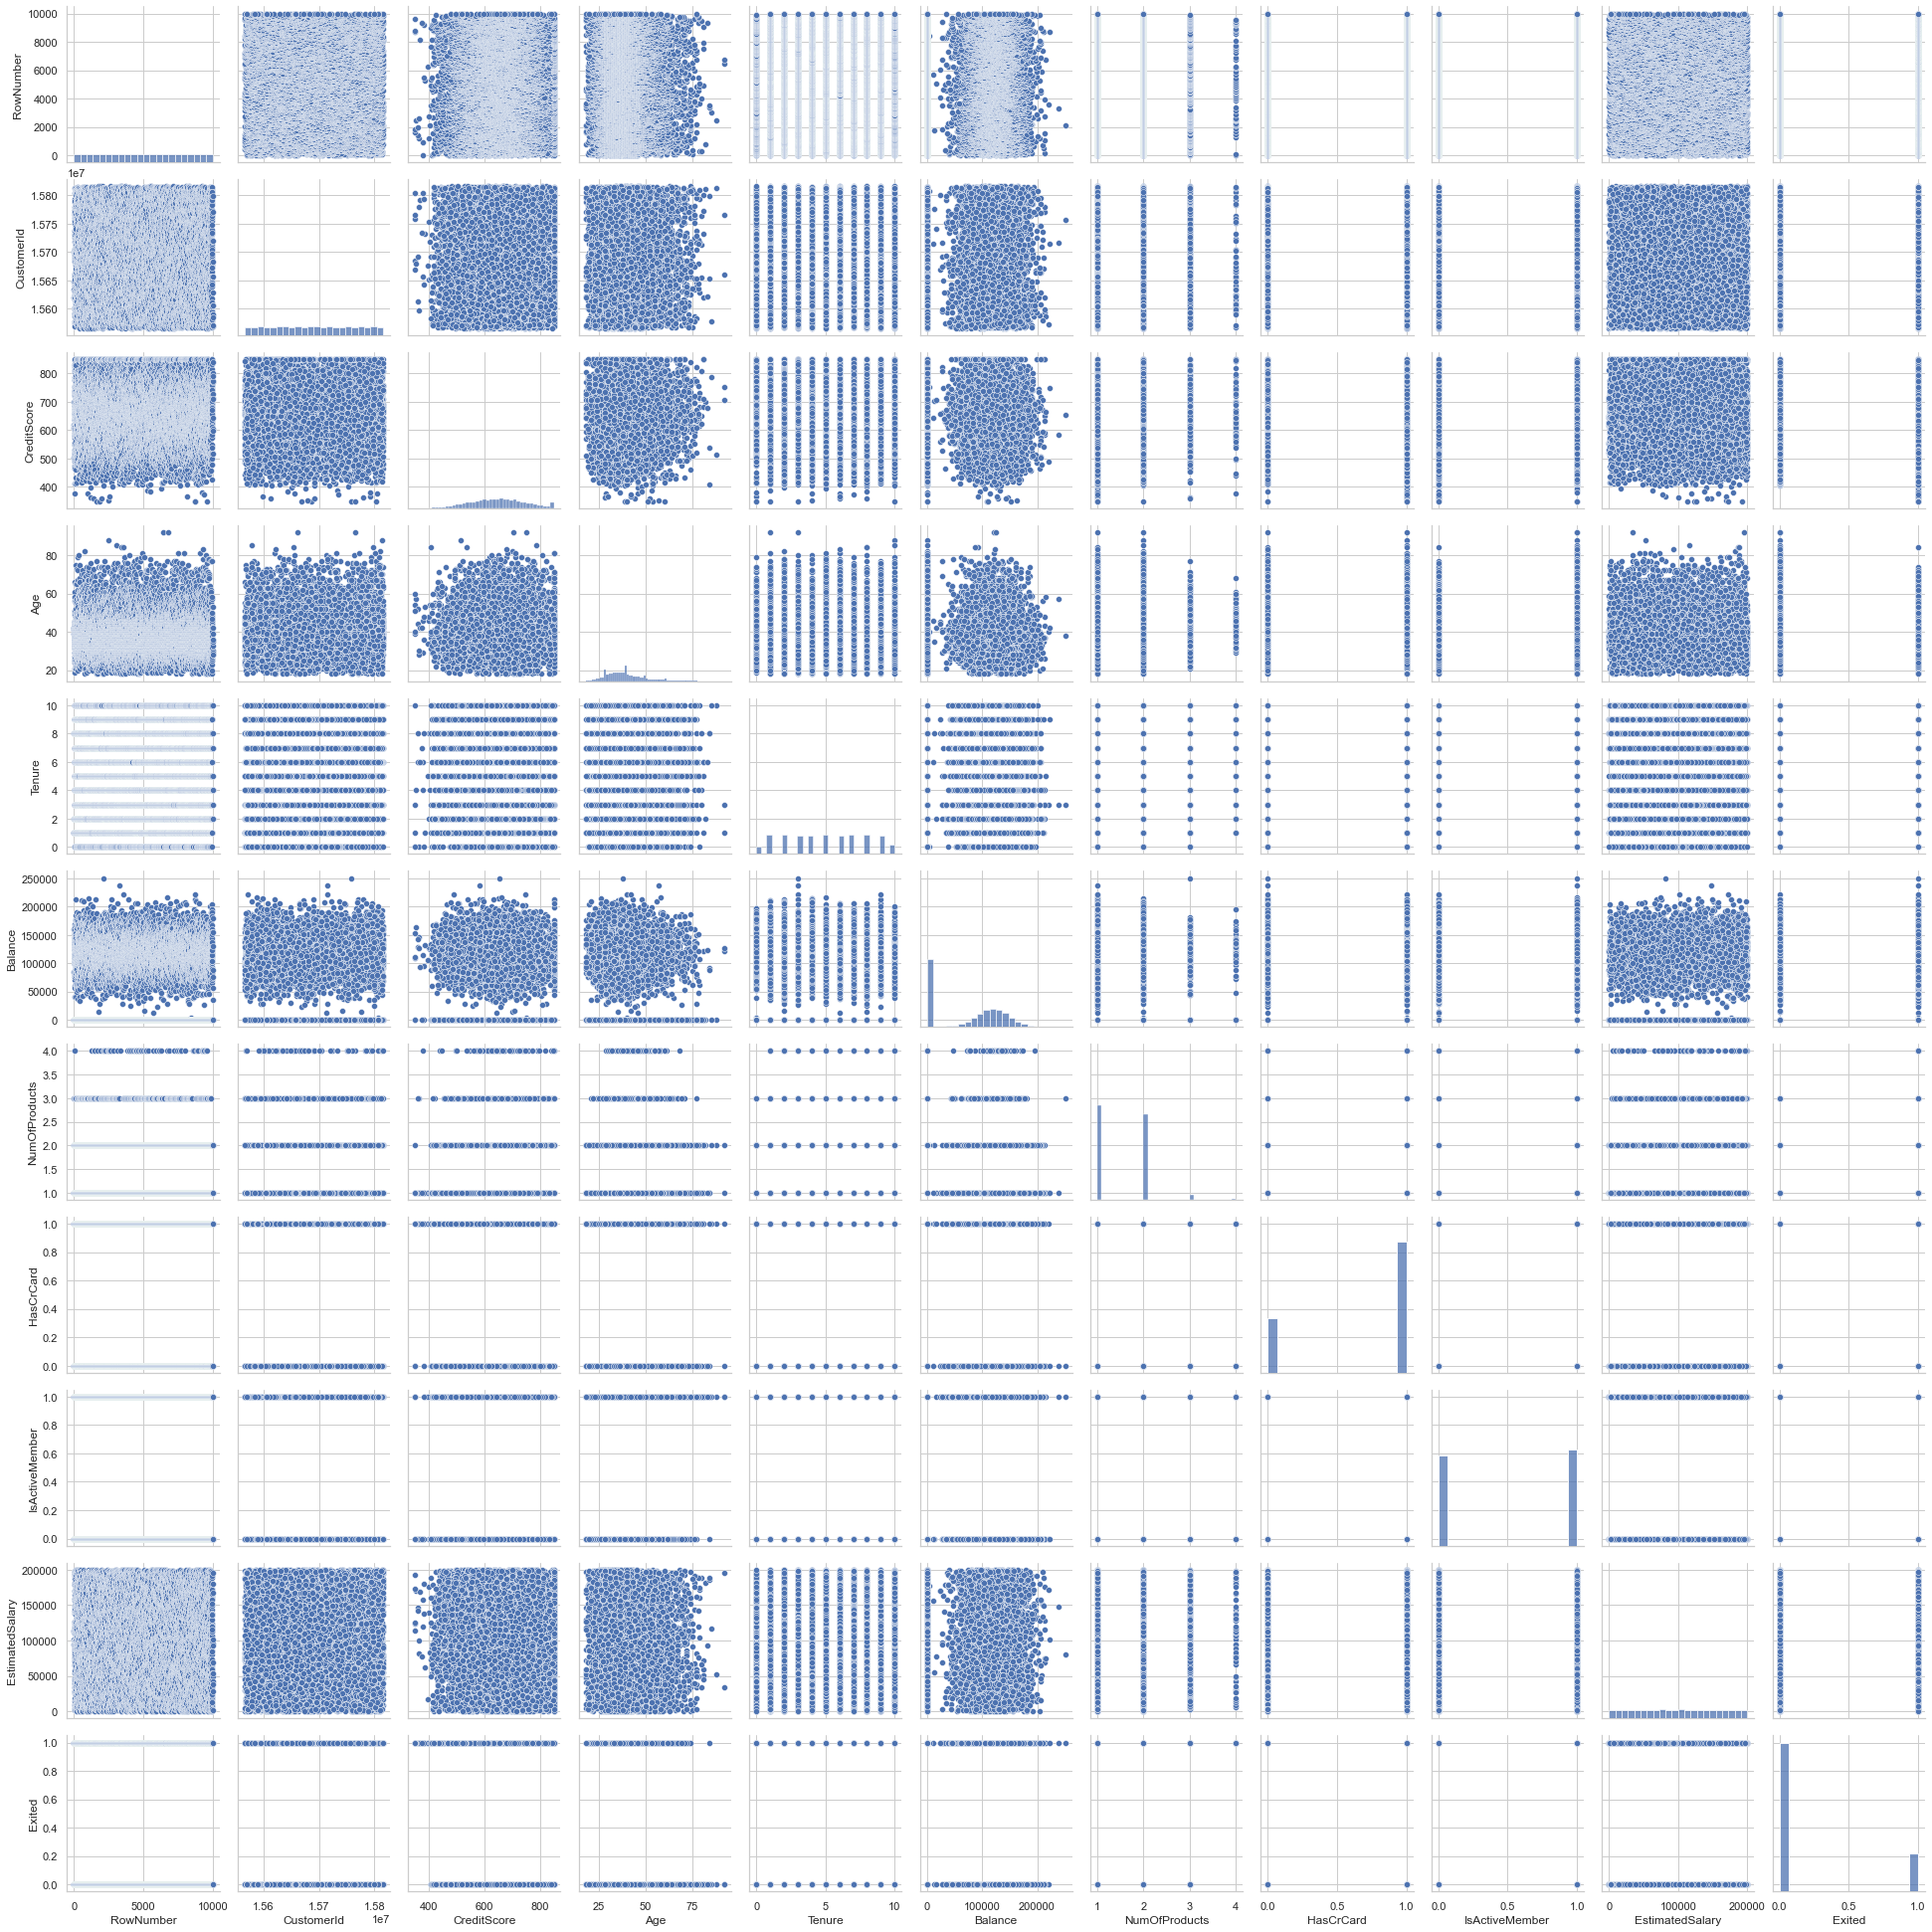

In [13]:
sns.pairplot(data)

In [3]:
data.shape

#(row, column)

(10000, 14)

In [4]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [5]:
data.describe()

RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
min         0.000000       1.000000      0.00000        0.000000   
25%         0.000000       1.000000      0.00000        0.000000   
50%     97198.540000       1.000000      1.00000        1.000000   
75%    127644.240000       2.000000      1.00000        1.000000   
max    250898.090000       4.000000      1.00000        1.000000   

       EstimatedSalary        Exited  
count     10000.000000  10000.000000  
mean     100090.239881      0.203700  
std       57510.492818      0.402769  
min          11.580000      0.000000  
25%       51002.110000      0.000000  
50%      100193.915000      0.000000  
75%      149388.247500      0.000000  
max      199992.480000      1.000000

### Univariate Analysis
***

In [10]:
data["Exited"].unique()

array([1, 0], dtype=int64)

In [11]:
keluar = data.loc[data["Exited"] == 1]
tidak_keluar = data.loc[data["Exited"] == 0]

keluar

RowNumber  CustomerId      Surname  CreditScore Geography  Gender  Age  \
0             1    15634602     Hargrave          619    France  Female   42   
2             3    15619304         Onio          502    France  Female   42   
5             6    15574012          Chu          645     Spain    Male   44   
7             8    15656148       Obinna          376   Germany  Female   29   
16           17    15737452        Romeo          653   Germany    Male   58   
...         ...         ...          ...          ...       ...     ...  ...   
9981       9982    15672754     Burbidge          498   Germany    Male   42   
9982       9983    15768163      Griffin          655   Germany  Female   46   
9991       9992    15769959  Ajuluchukwu          597    France  Female   53   
9997       9998    15584532          Liu          709    France  Female   36   
9998       9999    15682355    Sabbatini          772   Germany    Male   42   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0          2       0.00              1          1               1   
2          8  159660.80              3          1               0   
5          8  113755.78              2          1               0   
7          4  115046.74              4          1               0   
16         1  132602.88              1          1               0   
...      ...        ...            ...        ...             ...   
9981       3  152039.70              1          1               1   
9982       7  137145.12              1          1               0   
9991       4   88381.21              1          1               0   
9997       7       0.00              1          0               1   
9998       3   75075.31              2          1               0   

      EstimatedSalary  Exited  
0           101348.88       1  
2           113931.57       1  
5           149756.71       1  
7           119346.88       1  
16            5097.67       1  
...               ...     ...  
9981         53445.17       1  
9982        115146.40       1  
9991         69384.71       1  
9997         42085.58       1  
9998         92888.52       1  

[2037 rows x 14 columns]

<AxesSubplot:xlabel='CreditScore'>

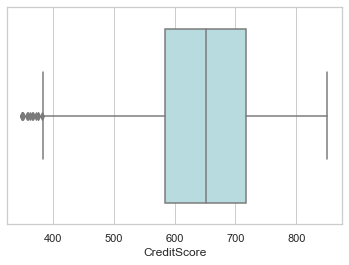

In [12]:
sns.boxplot(x = data['CreditScore'], color='powderblue')

<AxesSubplot:xlabel='CreditScore', ylabel='Density'>

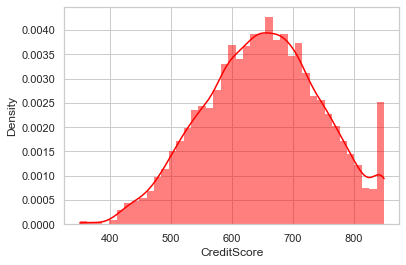

In [13]:
sns.histplot(x = data['CreditScore'], color='red', kde=True, stat='density', linewidth=0)

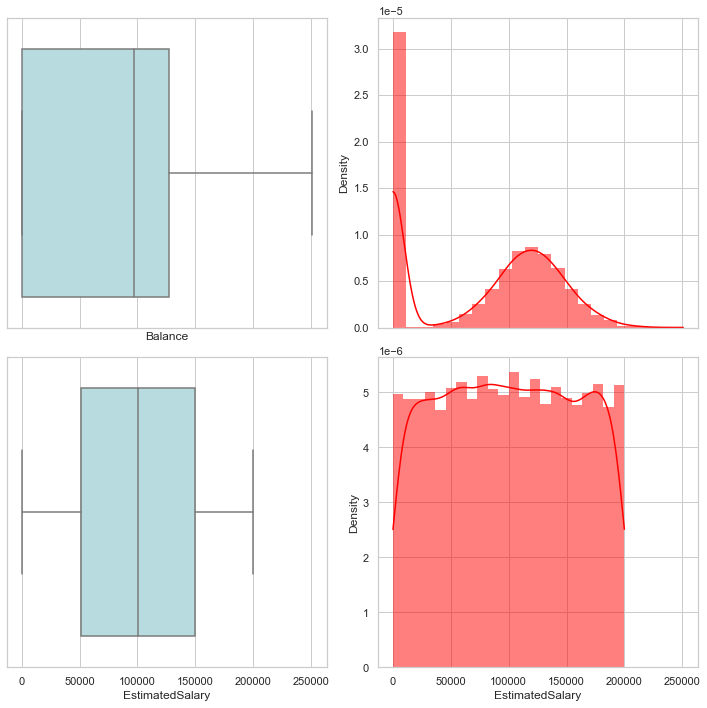

In [22]:
f, axes=plt.subplots(ncols=2, nrows=2, figsize=(10,10), sharex=True)

column=['Balance', 'EstimatedSalary']
for i in range(2):
    sns.boxplot(x = data[column[i]], ax=axes[i][0], color='powderblue')
    sns.histplot(data = data[column[i]], ax=axes[i][1], color='red', kde=True, stat='density', linewidth=0)
    
    plt.tight_layout()

<AxesSubplot:xlabel='Exited', ylabel='count'>

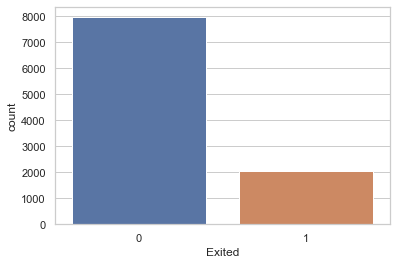

In [15]:
sns.countplot(x=data['Exited'])

## Bivariate Data Analysis
***

### Credit Score vs Exited

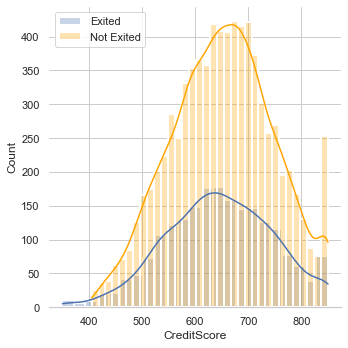

In [16]:
f, axes = plt.subplots(ncols = 1,figsize=(5, 5), sharex=True)
sns.despine(left=True)

sns.histplot(data=keluar["CreditScore"],label="Exited",color='b',kde=True,linewidth=2,alpha=0.3)
sns.histplot(data=tidak_keluar["CreditScore"],label="Not Exited",kde=True,color='orange',linewidth=2,alpha=0.3)

plt.legend()
plt.tight_layout()

Costumer yang memiliki credit score tinggi cenderung 'Not Exited', sedangkan yang memilki credit score rendah cenderung 'Exited.

### Estimated Salary vs Exited

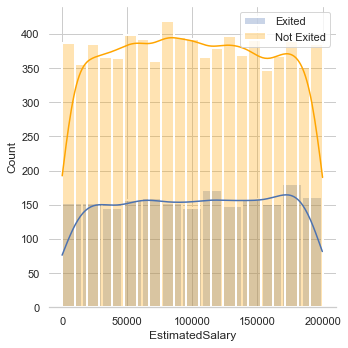

In [17]:
f, axes = plt.subplots(ncols = 1,figsize=(5, 5), sharex=True)
sns.despine(left=True)

sns.histplot(data=keluar["EstimatedSalary"],label="Exited",color='b',kde=True,linewidth=2,alpha=0.3)
sns.histplot(data=tidak_keluar["EstimatedSalary"],label="Not Exited",kde=True,color='orange',linewidth=2,alpha=0.3)

plt.legend()
plt.tight_layout()

Costumer yang memiliki Estimated Salary kebanyakan tidak akan keluar atau 'Not Exited', sedangkan yang memiliki Estimated Salary rendah cenderung keluar atau 'Exited'

In [16]:
sns.pairplot(data, hue="Exited", diag_kind="hist")
plt.show()

In [28]:
f, axes = plt.subplots(ncols = 2, figsize=(15, 7.5), sharex=True)
sns.despine(left=True)

sns.stripplot(x=data['Exited'], y=data['CreditScore'], ax=axes[0], linewidth=1)
sns.boxplot(x=data['Exited'], y=data['CreditScore'], ax=axes[1])

plt.show()

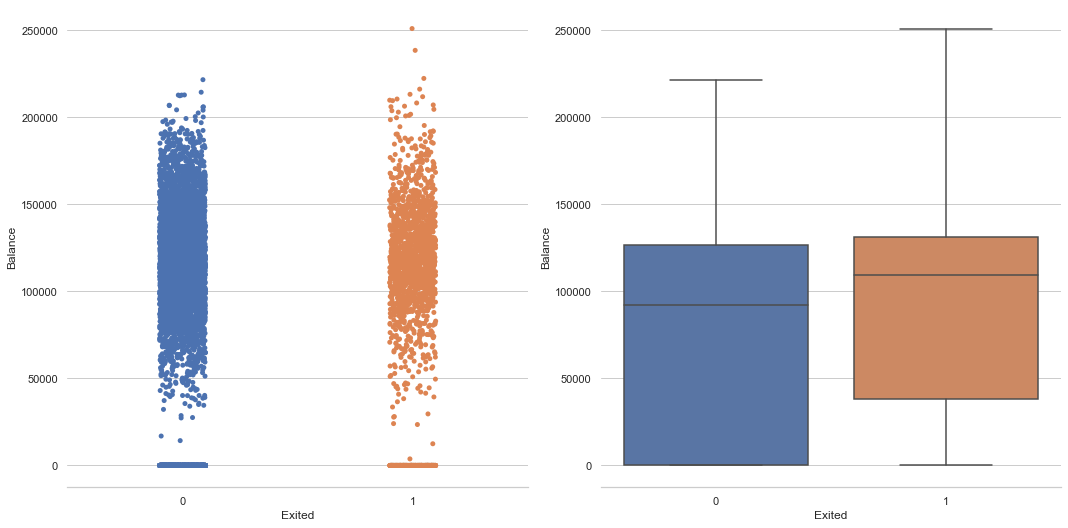

In [25]:
f, axes = plt.subplots(ncols = 2, figsize=(15, 7.5), sharex=True)
sns.despine(left=True)

sns.stripplot(x=data['Exited'], y=data['Balance'], ax=axes[0])
sns.boxplot(x=data['Exited'], y=data['Balance'], ax=axes[1])

plt.tight_layout()